# Foundations of Data Science
## S1 Week 03: Data representation I: Matplotlib

**Learning outcomes:** 
In this lab you will learn different plotting methods using Matplotlib. By the end of the lab you should be able to:
- understand how Matplotlib works under the hood,
- draw line graphs, stack graphs, bar charts and scatter graphs,
- set parameters of your plots.

**Remarks**
- For some exercises you might need to use google or the matplotlib documentation - the [Tutorials](https://matplotlib.org/3.2.1/tutorials/index.html) and [API reference](https://matplotlib.org/3.2.1/api/index.html) are the most useful sections. It is important to get familiar with looking up how to solve problems online. Throughout your career you will encounter many problems that other people have encountered too; there is no need to reinvent the wheel.
- We will not provide all the code in the tutorials, but expect you to be able to draw from previous labs to fill in gaps.
- Try not to use copy+paste when coding these labs, as typing will help you memorize the code better.
- Try to understand each detail in the code we provide, and read the comments!

After answering some questions about life expectancy, we will again take the role of a political advisor for the UN, and discuss climate data. 

**Research question:** Who is responsible for the $CO_2$ emissions world-wide? 

**Data information:** We will use data from [ourworldindata.org](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions), which we preprocessed. It contains $CO_2$ emissions data from 1900-2017, for different continents, and countries.

## A Matplotlib introduction

Matplotlib is a python plotting library with a similar interface to MATLAB's plot engine. The library is fully compatible with NumPy, and by extension pandas.

Drawing basic graphs with one-liners is quite easy with matplotlib, and maybe some of you have already drawn some graphs with pyplot. However, the matplotlib documentation or [stackoverflow questions with matplotlib tags](https://stackoverflow.com/questions/tagged/matplotlib) can feel overwhelming. With +70.000 lines it is a huge library, and while there are many quite extensive [resources](http://matplotlib.org/resources/index.html), some might be outdated, as this library evolves quickly. As with every lab in this course, we won't teach you the whole library; the goal is for you to get a solid understanding of how the library works, such that if you need to look something up you can understand it quickly. A helpful collection of example figures, in case you are looking for a particular feature you don't know or don't remember, can be found [here](https://matplotlib.org/tutorials/introductory/sample_plots.html).

In this lab we will only work through the main library `matplotlib.pyplot`. Let's start!

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## A.1 Matplotlib object hierarchy

Let's begin by understanding the structure of a plot and its terminology, which confuses many beginners. Understanding this structure is important and the lack of understanding stops many developers from drawing good graphs. Copy+Pasting stackoverflow answers will only get you so far, and if you haven't understood the difference between *axes* and *axis*, it will take you a long time to draw the right graph by trial and error.

A plot object in matplotlib has a hierarchical (tree-like) structure. At the "root" is the `figure` container.
Each figure can contain multiple `axes` objects, which is the next smallest object in the hierarchy. *An* axes$^1$ translates into what we think of as an individual plot or graph. This is not to be confused with `axis` (in 2D setting `x` and `y`, and in 3D plots `z`).

$^1$ In English *axes* is a plural, but in matplotlib terminology it is singular.

![title](images/fig_map.png)

From the [matplotlib documentation](https://matplotlib.org/1.5.1/_images/fig_map.png).

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


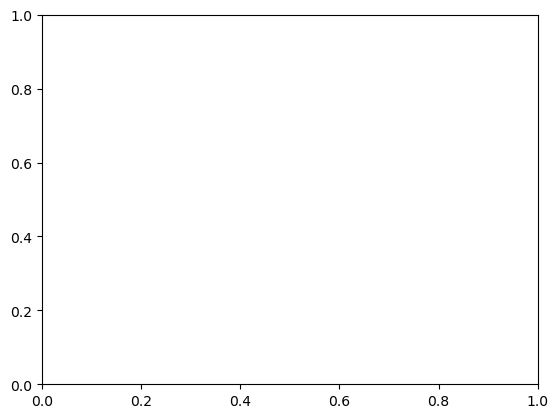

In [3]:
# Let's double check the statements above about the hierarchy
fig, _ = plt.subplots() # Creates a figure with several plots
print(type(fig))
print(type(fig.axes[0])) # as stated above each figure can have several axes, thus type(fig.axes) returns "List"

Below the axes in the hierarchy we find many objects such as legends, labels, lines... Each element of a plot is its own manipulable Python object all the way down to the ticks and labels.

![title](images/sphx_glr_anatomy_001.png)

From the [matplotlib documentation](https://matplotlib.org/3.2.1/_images/sphx_glr_anatomy_001.png).

In [4]:
# Let's double check the hierarchy, and the statement, that we can traverse the tree down all the way to ticks
first_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(first_tick)

matplotlib.axis.YTick

## B Line plots

The default plots in matplotlib are line plots. They connect different points specified as `([x1, x2, x3, ...], [y1, y2, y3 ...])`. If only one array is given, matplotlib assumes that the x coordinates are `[0, 1, 2, ...]`.

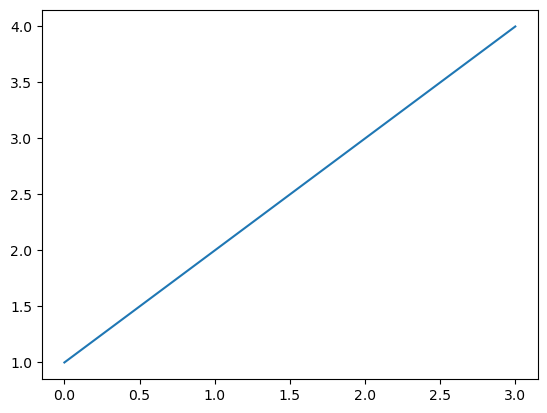

In [5]:
plt.plot([1, 2, 3, 4]) # Remark that the coordinates are not (1,1), (2,2)... but (0,1), (1,2), ...
plt.show()

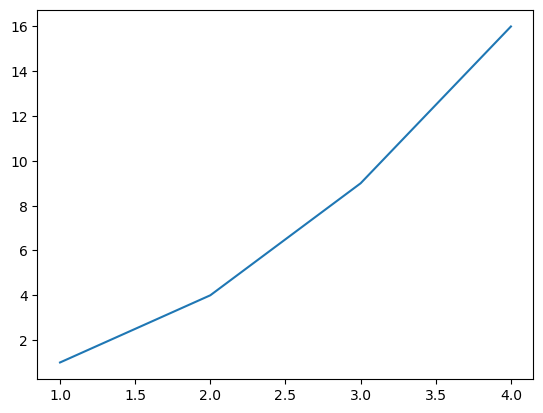

In [6]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

**Remark** We call these plots line plots, but we actually plot points that happen to be connected *by default* with straight lines. This can be changed by adding a third parameter, which specifies the colour of the points and how they should be connected. The default is `'b-'`, which stands for *blue* (`b`) *line* (`-`). Let's try some different options.

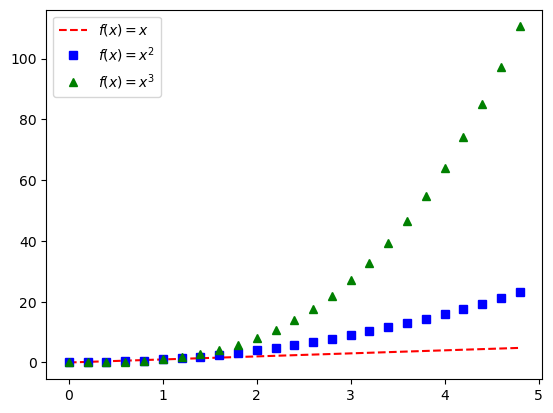

In [7]:
# Evenly sampled time at 200ms intervals
x = np.arange(0., 5., 0.2)
y1 = x
y2 = x**2
y3 = x**3

# Red dashes, blue squares and green triangles
# Note that we can plot multiple sets of data using extra arguments to the plot command
plt.plot(x, y1, 'r--', x, y2, 'bs', x, y3, 'g^')
# A legend is helpful when having several plots in one figure and we can use LaTeX notation for maths
# between dollar signs
plt.legend(['$f(x) = x$', '$f(x) = x^2$', '$f(x) = x^3$'])
plt.show()

### Representing functions

How do we draw mathematical functions, if we can only plot points and straight lines? The plot above already hints at the solution. We just 'sample' a function often enough and keep the distance between two points so small that to the naked eye it looks like a smooth curve.

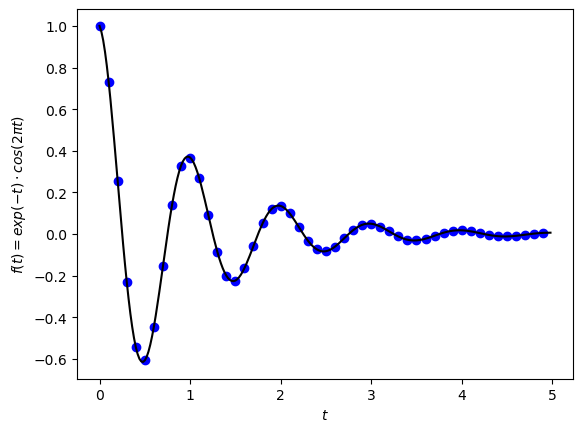

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k') # Note that 'k' stands for black
plt.xlabel('$t$') # You can use Latex to write mathematical formulas by using $formula$ 
plt.ylabel('$f(t)=exp(-t) \cdot cos(2\pi t)$')
plt.show() # Remark: t2 samples 5 times more often and thus appears to be a smooth curve

## C Stateful vs Stateless

Before we get into more types of plots, this is a good moment to discuss one last theoretical technicality: the difference between the **stateful** (state-machine) and **stateless** (object-oriented) interfaces.

Above, we said that each figure is an object with different axes, each being objects themselves. However, we created the axes using `plt.plot()`, which is a *function* call not a method. I.e. `plt` refers to the library; it is not an object with a `plot()` member function. But how does the machine know which figure or plot we refer to, when we want to change, for example, the x-axis label?

In the matplotlib docs we find the following statement:

    “[With pyplot], simple functions are used to add plot elements (lines, images, text, etc.) to the current axes in the current figure.”
    
The above means that almost all functions from pyplot (which we have imported as `plt`, by convention) are implicitly either referring to an existing current figure and axes, or creating them from scratch if none exist. This is the stateful approach.

Modifying the underlying objects directly is the stateless/object-oriented approach. We can do this by calling *methods* of an axes object, which is the object that represents a plot itself.

So `plt.plot()` actually first calls `ax = plt.gca()` (get current axes), and then calls on the current axes `ax.plot()`. This is why many functions that you can call are just wrapper functions, which have either the same name or setter and getter function names, e.g.
- `plt.title()` $\implies$ `ax.set_title()`
- `plt.xlabels()` $\implies$ `ax.set_xlabel()`
- `plt.legend()` $\implies$ `ax.legend()`
- ...

Now that we know the different approaches (stateful and stateless), we can jump between axes and assign properties to different axes. This allows us to create subfigures.

## D Subfigures

We already briefly used `fig, ax = plt.subplots(nrows, ncols)`, where `ax` is a list of axes. By default `subplots()` returns a figure with one axes (nrows=1, ncols=1). Let's draw a figure with several rows and columns.

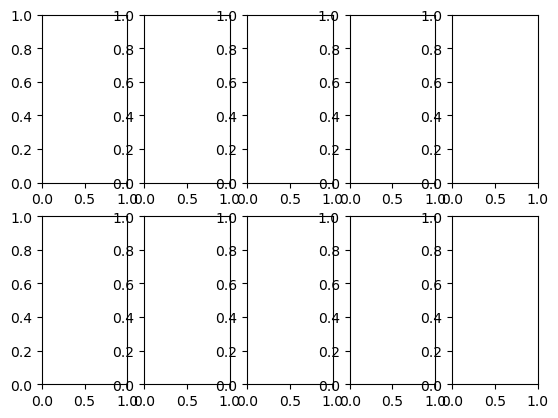

In [9]:
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5) 

You could also use `fig, ax = plt.subplots(2, 5)` instead, and then either **unpack** it with `ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10 = ax.flatten()` or access each axes with **indexing**, i.e. `ax[0][0]`. 

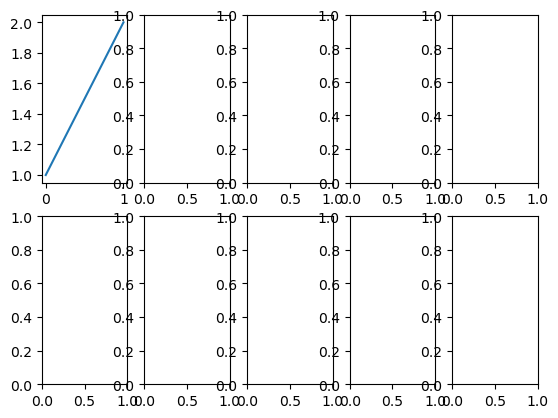

In [10]:
fig, ax = plt.subplots(2, 5)
ax[0][0].plot([1,2])

This all seems quite cramped up. Let's fix the **size of the figure**. You can do this by adding the attribute `figsize=(width,height)` as a parameter to the `plt.subplots()` function. However, just playing around with the right numbers will take you a long time every time. We believe that it is important for you to understand what is happening when you add the `figsize` attribute to the function, and will give you a short explanation on the confusing topic of figure sizing. 

In maptlotlib the size of the figure is specified in inches, i.e. `figsize=(width in inches, height in inches)`. If you want to use your figure in a paper that is easy to use. However, when you prepare a presentation for a screen this becomes more complicated, as every screen has a different resolution, and PNG images are measured in pixels. This already means that each one of you might see the figures you have printed above in different sizes. To convert from inches to pixels a conversion factor 72 dpi (dots per inch) is applied by default. The default figure size is 6 inches wide and 4 inches high, which corresponds to 432 pixels wide and 288 high, when multiplied by 72dpi. We can see this when we save the figure to a png file like this:

In [11]:
print("Size in inches", fig.get_size_inches())
print("DPI", fig.get_dpi())
print("Size in pixels", fig.get_dpi()*fig.get_size_inches())
fig.savefig("myfig.png")

Size in inches [6.4 4.8]
DPI 100.0
Size in pixels [640. 480.]


If you open `myfig.png` in a image viewer (or your web browser), you should see that its size is 432x288 pixels.

Now that we know a bit more about figure sizing, we'll try making the figure twice as wide.

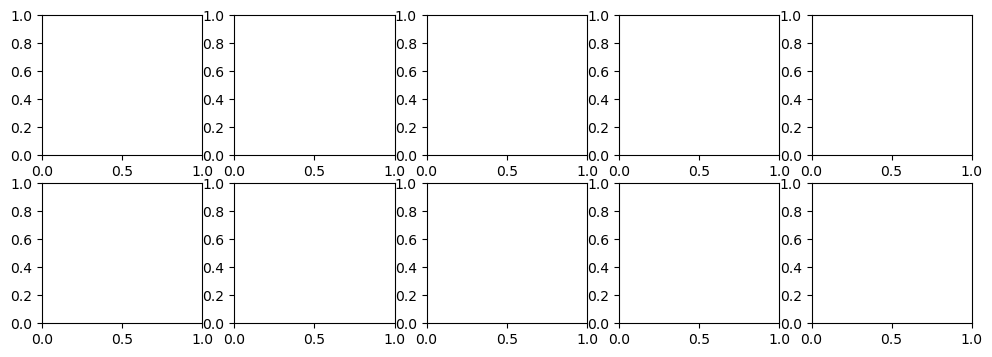

In [12]:
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(12, 4))

The text is still spread out, but overlapping a bit. If you have a small screen, the right hand side of the figure maybe touching the right margin. With a larger screen there is probably still some space. What happens if we make the figure wider than the screen?

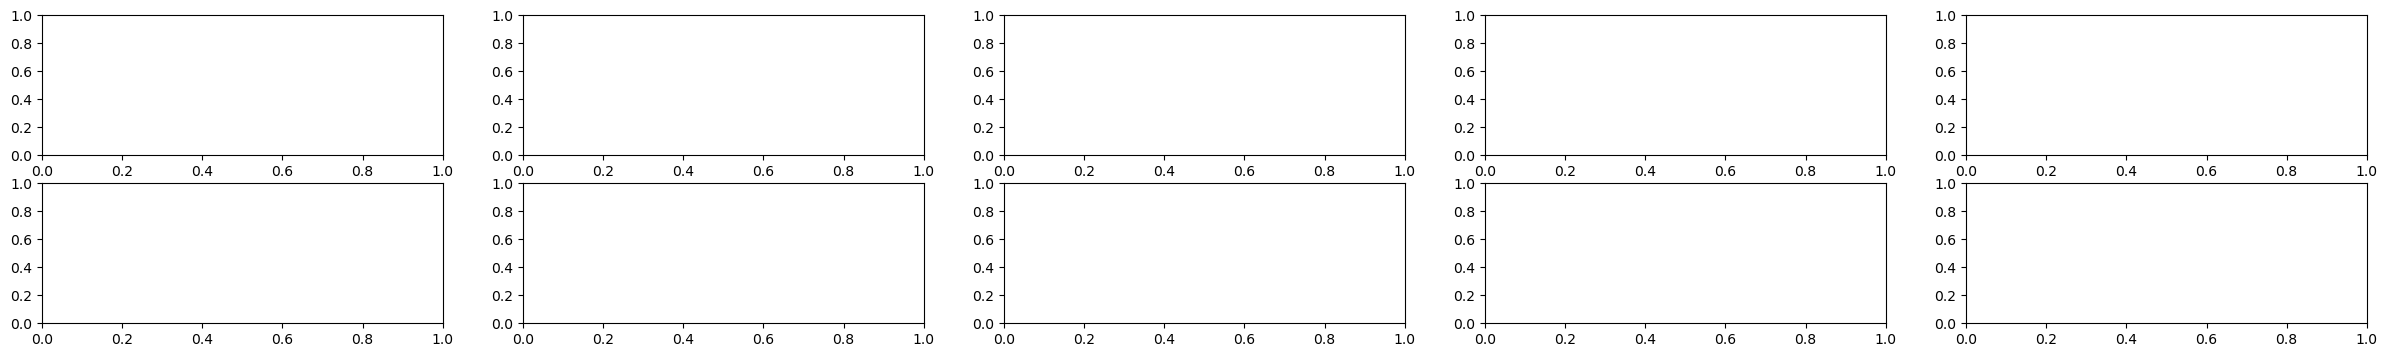

In [13]:
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(30, 4))

The image file is now 2.5 times as wide in terms of pixels, but it has been scaled down to the width of the document on *your* screen. The result is that the labels are now much further apart, and therefore not overlapping each other. However, they are also a lot smaller - about half the size. By default matplotlib produces plot labels in 10pt. Now, the labels are about 5pt large. Can you read them? (They are too small for at least one of your lecturers!)

Scaling labels down in size might be OK when you are working on a problem - though you might miss something important if you can't read the scale or labels. For the final visualisation, the labels **must** be legible - at least 8pt. If the plot labels are overlapping you'll need to find some other solution of preventing this happening, e.g. fewer plots, a different grid arrangement or not repeating aligned axes. To make sure you create legible plots, we suggest the following:
- In Jupyter Notebooks, keep your plots a maximum of 15 inches wide.
- For a printed or PDF document, create the figure with the same dimensions as you want on the page. E.g. if you want a figure that is 6 inches wide by 4 high, create it with `figsize=(6, 4)`. You may also want to increase the DPI to 150, to give a better quality image.

The easiest solution in our case, might be to use 5 rows and 2 columns for the figures instead of 2 rows and 5 columns. 

**Exercise 01:** 
- Create a new figure with 10 subplots, with 2 subplots in each row. Make the total width of the figure 10 inches wide and the total height 15 inches.
- Assign the different 10 axes the names ax1, ..., ax10

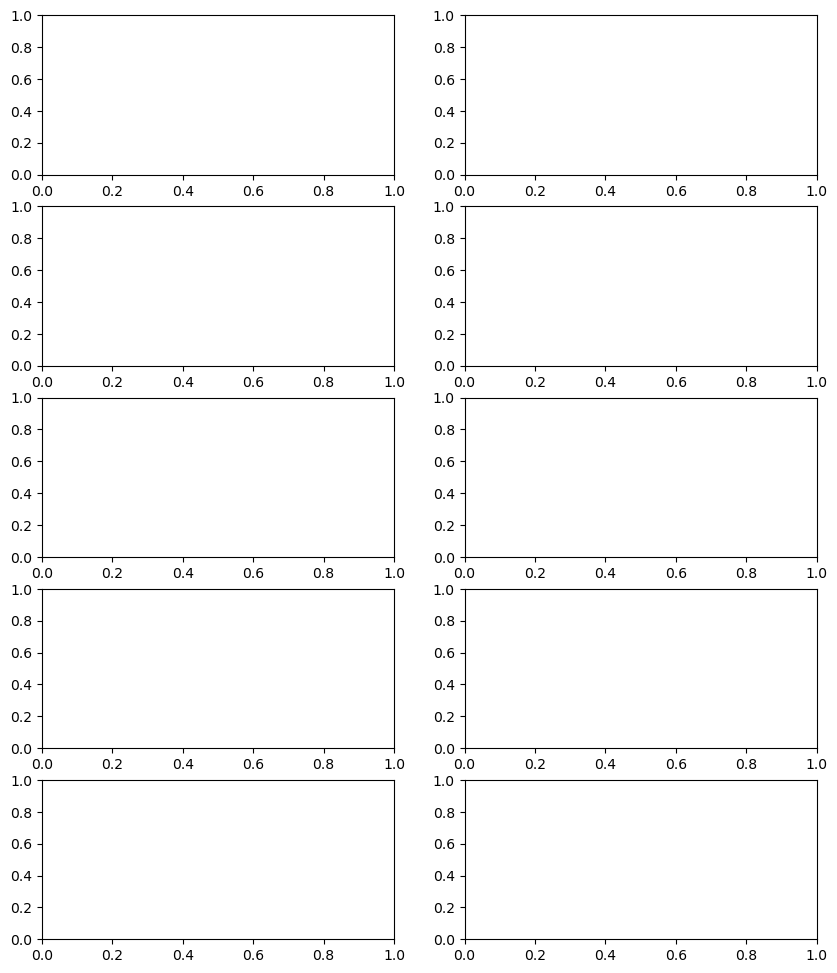

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(10, 12))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10 = ax.flatten()

That was quite an in-depth digression on figure sizing. However, once you have understood how the figure sizing works, and how the size of the labels might change, you can easily fix the figure to the right size with the right label size without having to play around for ages.

Now we're going to fill the axes above with data about worldwide CO2 emissions.

The first step towards understanding who is responsible for worldwide CO2 emissions is to look at historical data. We will therefore look at the CO2 emissions of various regions since 1900.

**Exercise 02:** 

a) Load the following csv files as DataFrames
- annual_co2_africa.csv
- annual_co2_europe.csv
- annual_co2_asia.csv
- annual_co2_americas.csv
- annual_co2_china.csv
- annual_co2_eu28.csv
- annual_co2_india.csv
- annual_co2_international.csv
- annual_co2_middleeast.csv
- annual_co2_us.csv

The files are found in `datasets`. Make sure that the DataFrame variable names have the name of the files for the rest of the tutorial to work, i.e. `annual_co2_africa.csv` $\implies$ annual_co2_africa .

b) Finally, once all the files are loaded look at the last few entries of one data frame, to get an idea of the data.

In [15]:
annual_co2_africa = pd.read_csv('datasets/annual_co2_africa.csv')
annual_co2_europe = pd.read_csv('datasets/annual_co2_europe.csv')
annual_co2_asia = pd.read_csv('datasets/annual_co2_asia.csv')
annual_co2_americas = pd.read_csv('datasets/annual_co2_americas.csv')
annual_co2_china = pd.read_csv('datasets/annual_co2_china.csv')
annual_co2_eu28 = pd.read_csv('datasets/annual_co2_eu28.csv')
annual_co2_india = pd.read_csv('datasets/annual_co2_india.csv')
annual_co2_international = pd.read_csv('datasets/annual_co2_international.csv')
annual_co2_middleeast = pd.read_csv('datasets/annual_co2_middleeast.csv')
annual_co2_us = pd.read_csv('datasets/annual_co2_us.csv')

Now that we have the data loaded, let's plot the data using subplots, to compare the CO2 emissions across regions.

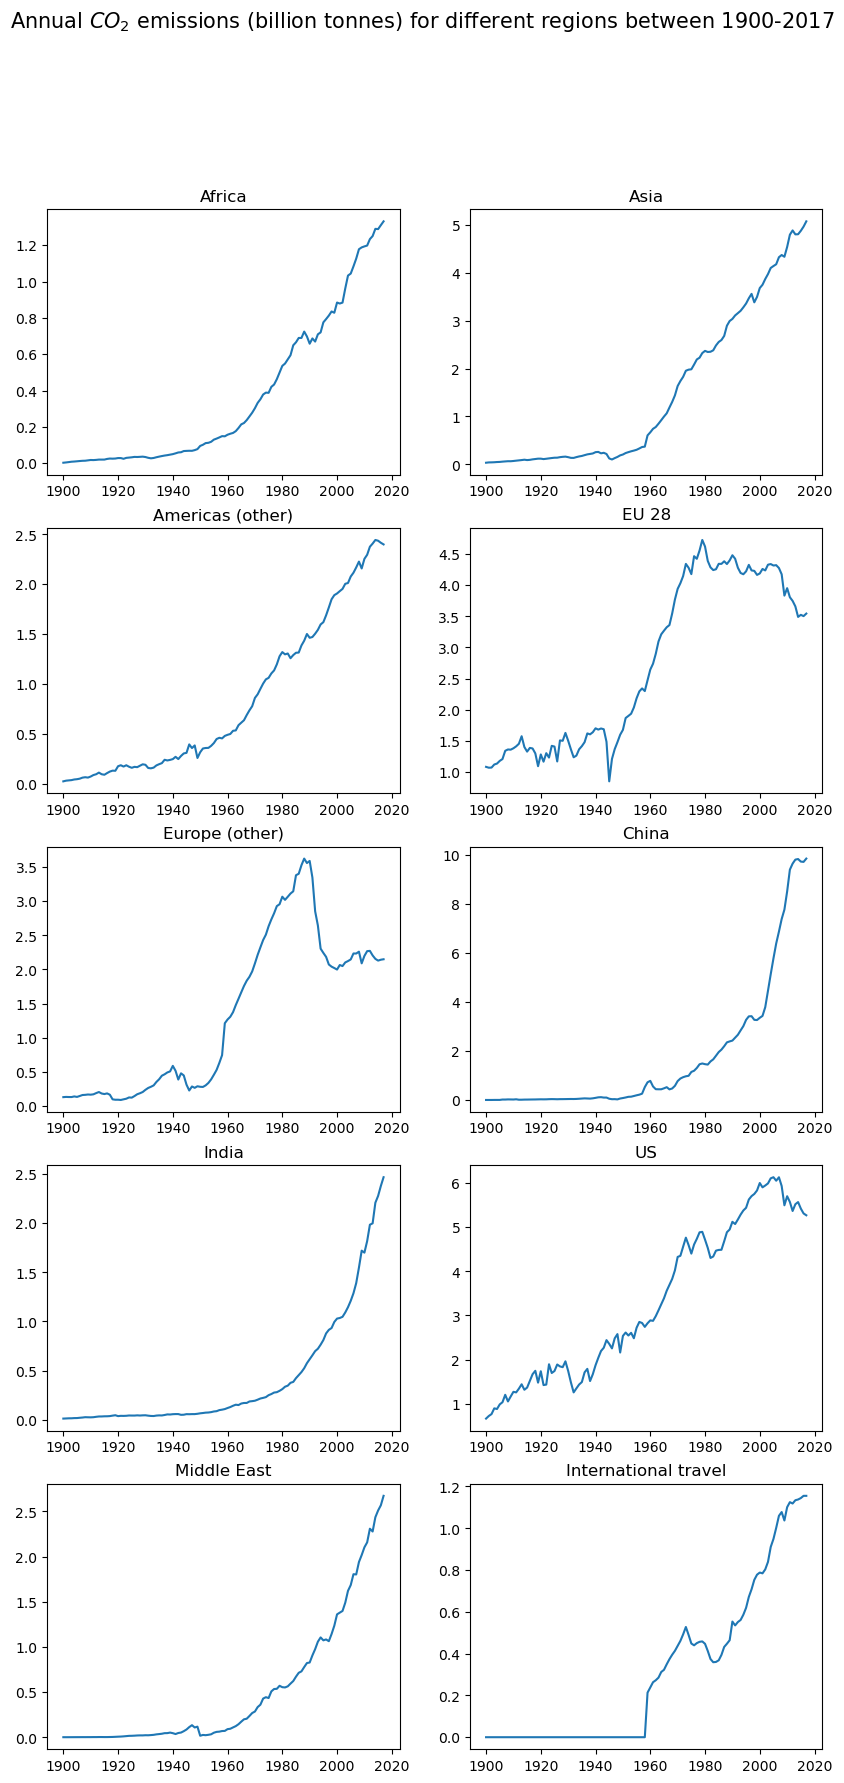

In [16]:
# Figure
fig, ax = plt.subplots(5,2, figsize=(10, 20))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10 = ax.flatten()
#Setting titles of subplots
ax1.set_title('Africa')
ax2.set_title('Asia')
ax3.set_title('Americas (other)')
ax4.set_title('EU 28')
ax5.set_title('Europe (other)')
ax6.set_title('China')
ax7.set_title('India')
ax8.set_title('US')
ax9.set_title('Middle East')
ax10.set_title('International travel')
#Setting title of main plot
fig.suptitle('Annual $CO_2$ emissions (billion tonnes) for different regions between 1900-2017', fontsize=15)
# Plotting the data
# Careful, above we mentioned that the y axis is in billion tonnes, the data however is in tonnes, thus we need to divide the data by 1e9
ax1.plot(annual_co2_africa['Year'], annual_co2_africa['Annual CO₂ emissions (tonnes )']/1e9)
ax2.plot(annual_co2_asia['Year'], annual_co2_asia['Annual CO₂ emissions (tonnes )']/1e9)
ax3.plot(annual_co2_americas['Year'], annual_co2_americas['Annual CO₂ emissions (tonnes )']/1e9)
ax4.plot(annual_co2_eu28['Year'], annual_co2_eu28['Annual CO₂ emissions (tonnes )']/1e9)
ax5.plot(annual_co2_europe['Year'], annual_co2_europe['Annual CO₂ emissions (tonnes )']/1e9)
ax6.plot(annual_co2_china['Year'], annual_co2_china['Annual CO₂ emissions (tonnes )']/1e9)
ax7.plot(annual_co2_india['Year'], annual_co2_india['Annual CO₂ emissions (tonnes )']/1e9)
ax8.plot(annual_co2_us['Year'], annual_co2_us['Annual CO₂ emissions (tonnes )']/1e9)
ax9.plot(annual_co2_middleeast['Year'], annual_co2_middleeast['Annual CO₂ emissions (tonnes )']/1e9)
ax10.plot(annual_co2_international['Year'], annual_co2_international['Annual CO₂ emissions (tonnes )']/1e9)

At first glance, it looks like each region has about the same trajectory. However, if you look at the different y-axes, you will realize that all of them have different scales. This is very important and a problem often occurring in data comparisons. Let's fix it.

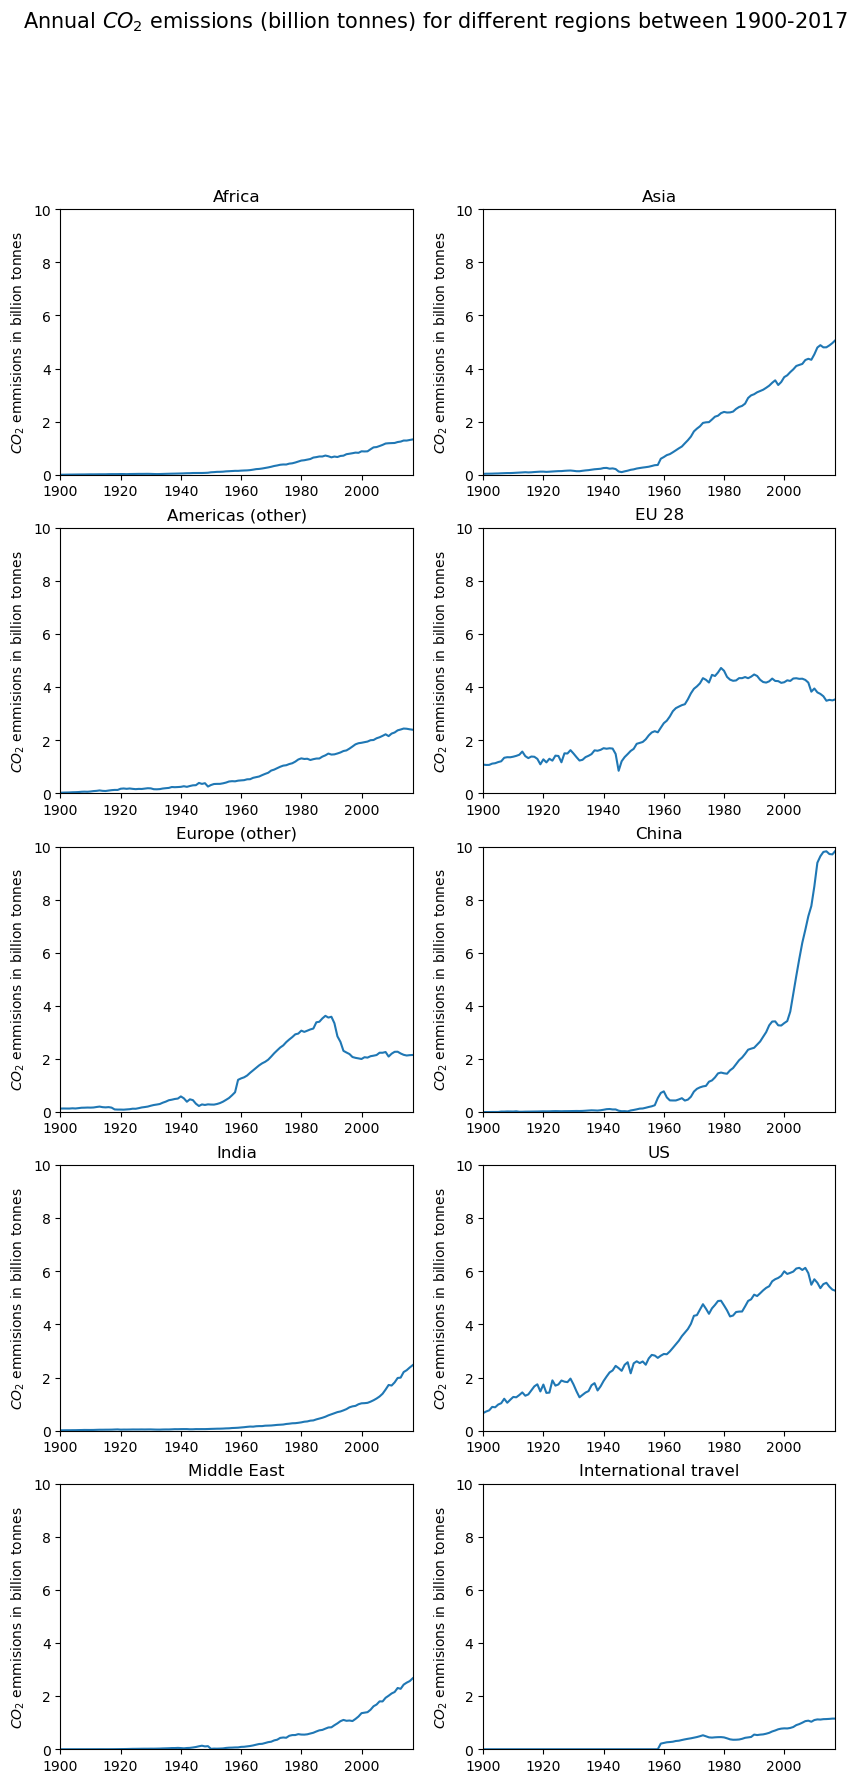

In [17]:
# Global settings (applying to all subplots) .setp(axes, parameter = value, ...)
# You can also just set the parameters for a subplot, e.g. plt.setp(ax1, parameter = value, ...)
# By setting ylim for all axes in ax, we can guarantee the same scale. 
plt.setp(ax, xlim=[1900, 2017], ylim=[0, 10], ylabel = '$CO_2$ emmisions in billion tonnes')
fig # This line is just for Jupyter notebooks, in order to show the figure

Looking at the plots, we notice a few things: 
- China is currently producing far more CO2 emissions than any other region.
- Looking at EU-28 and US data, one can clearly see the 1929 Economic crisis, WW II, 1979 energy crisis and other historical events.
- Even with the CO2 emission reduction efforts of the last few years, we are still far away from the goal of zero CO2 emissions.

**Exercise 03:** 

Make a new plot containing all the different time courses in one single plot. Remember to use a legend for the different time courses, and to set the label for the axis, if necessary. Use a different color for each region, such that the reader can differentiate the different plots. You can use [ColorBrewer](https://colorbrewer2.org/#type=sequential&scheme=YlGnBu&n=9) for example to get different colours. Remember that the reader might have difficulties differentiating different colours.

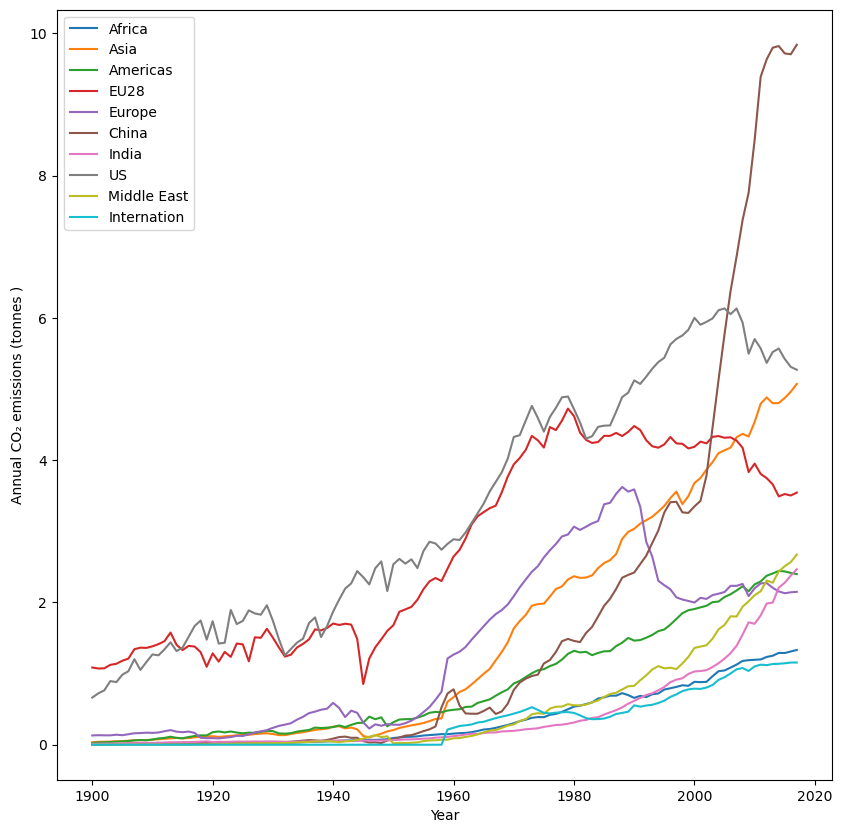

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlabel('Year')
ax.set_ylabel('Annual CO₂ emissions (tonnes )')

ax.plot(annual_co2_africa['Year'], annual_co2_africa['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_asia['Year'], annual_co2_asia['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_americas['Year'], annual_co2_americas['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_eu28['Year'], annual_co2_eu28['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_europe['Year'], annual_co2_europe['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_china['Year'], annual_co2_china['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_india['Year'], annual_co2_india['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_us['Year'], annual_co2_us['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_middleeast['Year'], annual_co2_middleeast['Annual CO₂ emissions (tonnes )']/1e9)
ax.plot(annual_co2_international['Year'], annual_co2_international['Annual CO₂ emissions (tonnes )']/1e9)

ax.legend(['Africa', 'Asia', 'Americas', 'EU28', 'Europe', 'China', 'India', 'US', 'Middle East', 'Internation'])

**Discussion:** Discuss with your lab partner what the advantages and disadvantages are between the two representations, i.e. a single plot for all regions vs 10 subplots for each region. Write down your answer:

Your answer:


## E Stack plots, bar charts and  scatter plots

Now that we have seen how the CO2 emissions evolved in the different regions, it might be interesting to see how the CO2 emission evolved worldwide, and which regions have the biggest share over time. We can do this using **stack plots**.

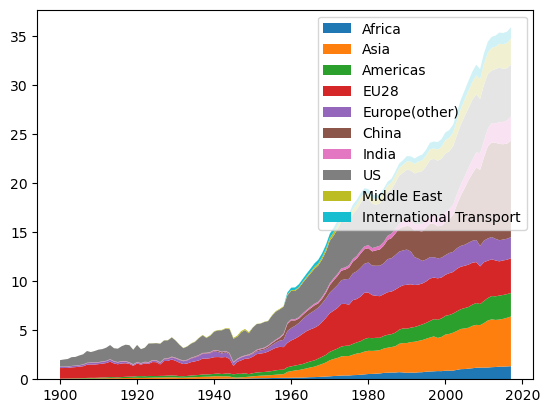

In [19]:
plt.stackplot(annual_co2_africa['Year'], # x value
              annual_co2_africa['Annual CO₂ emissions (tonnes )']/1e9, # y1 value  
              annual_co2_asia['Annual CO₂ emissions (tonnes )']/1e9,  # y2 value ...
              annual_co2_americas['Annual CO₂ emissions (tonnes )']/1e9, 
              annual_co2_eu28['Annual CO₂ emissions (tonnes )']/1e9, 
              annual_co2_europe['Annual CO₂ emissions (tonnes )']/1e9,
              annual_co2_china['Annual CO₂ emissions (tonnes )']/1e9,
              annual_co2_india['Annual CO₂ emissions (tonnes )']/1e9,
              annual_co2_us['Annual CO₂ emissions (tonnes )']/1e9,
              annual_co2_middleeast['Annual CO₂ emissions (tonnes )']/1e9,
              annual_co2_international['Annual CO₂ emissions (tonnes )']/1e9)
plt.legend(['Africa', 'Asia','Americas', 'EU28', 'Europe(other)', 'China', 'India', 'US', 'Middle East', 'International Transport'])
plt.show()

**Discussion** Discuss with your lab partner what the advantages and disadvantages are of a stack plot and a line plot, and when to us which format. Discuss with your partner what the problems are of the plot above. Write down your answer:

Your answer:


We have seen that currently China has the biggest CO2 emission, but what about the cumulative CO2 emissions from 1900 to 2017?

### Categorical data representation

**Exercise 04:** 

a) Load the `cumulative_co2_emissions.csv` file, from `datasets`, and save it as a DataFrame with the variable name `cumulative_co2_emissions`.

b) Check how many entries the file has.

c) Use `.head(length)` to show all data entries.

In [30]:
cumulative_co2_emissions = pd.read_csv('datasets/cumulative_co2_emissions.csv')
length = cumulative_co2_emissions.size
cumulative_co2_emissions.head(length)

,Entity,Cumulative CO₂ emissions by region (billion tonnes)
0,Africa,43.117574
1,India,48.557863
2,Middle East,60.473231
3,Americas (other),98.641160
4,Europe (other),157.540186
5,Asia and Pacific (other),178.057272
6,China,200.136494
7,EU-28,352.858256
8,United States,399.378341


The entity is a categorical variable and the cumulative emissions are numeric. It's technically possible to represent such data either with line plots, where on the x-axis we use an array of categories, and on the y-axis the values, or we can use **bar charts**. Let's compare how the three work for this data.

<BarContainer object of 9 artists>

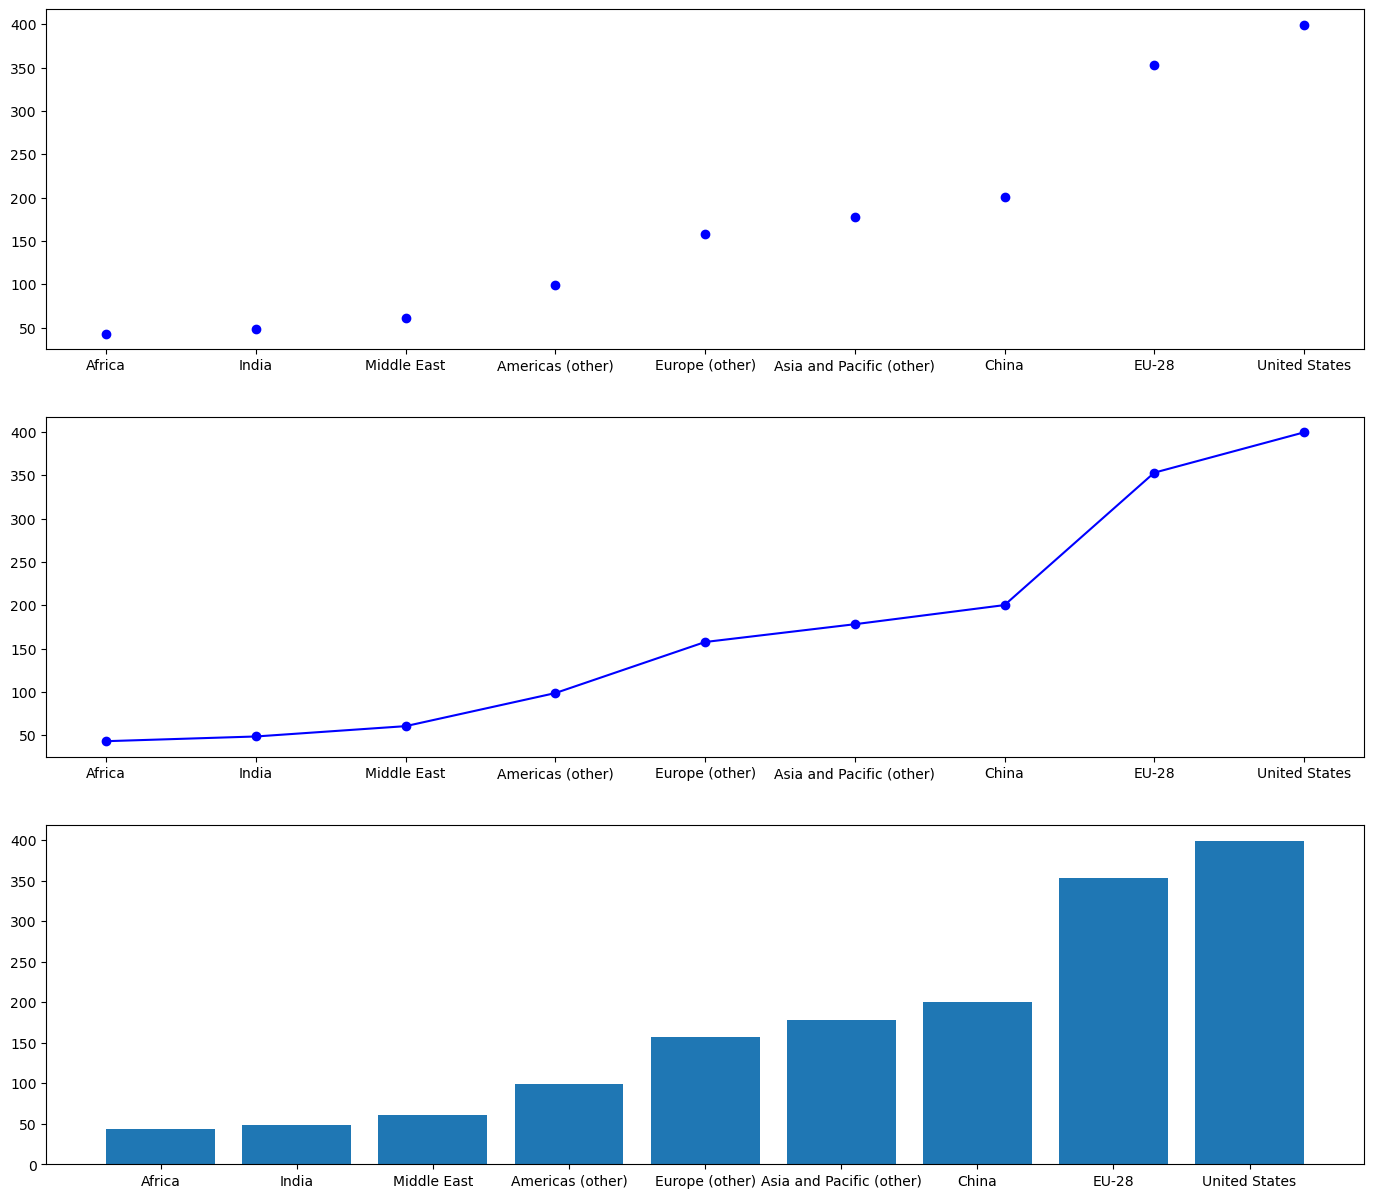

In [37]:
region = cumulative_co2_emissions['Entity']
co2_emissions = cumulative_co2_emissions['Cumulative CO₂ emissions by region (billion tonnes)']
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(17, 15))
ax1.plot(region, co2_emissions, 'bo')
ax2.plot(region, co2_emissions, 'bo-')
ax3.bar(region, co2_emissions)

**Discussion** Discuss with your lab partner which representation is the most suitable for the above data. Also can you spot any problems common to all the plots?

Your answer:

A typical problem, seen in the plots above, when using categorical data, is that the names of the categories are often too long and overlap. One way to solve it would be to swap the x and y axes.

<BarContainer object of 9 artists>

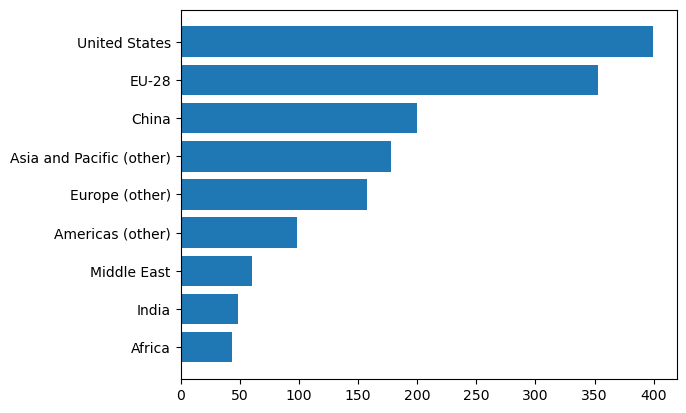

In [38]:
plt.barh(region, co2_emissions) # Careful: in .barh() the y-axis is the first parameter

Another option is to incline the labels of the categorical data:

[Text(0.0, 0, 'Africa'),
 Text(1.0, 0, 'India'),
 Text(2.0, 0, 'Middle East'),
 Text(3.0, 0, 'Americas (other)'),
 Text(4.0, 0, 'Europe (other)'),
 Text(5.0, 0, 'Asia and Pacific (other)'),
 Text(6.0, 0, 'China'),
 Text(7.0, 0, 'EU-28'),
 Text(8.0, 0, 'United States')]

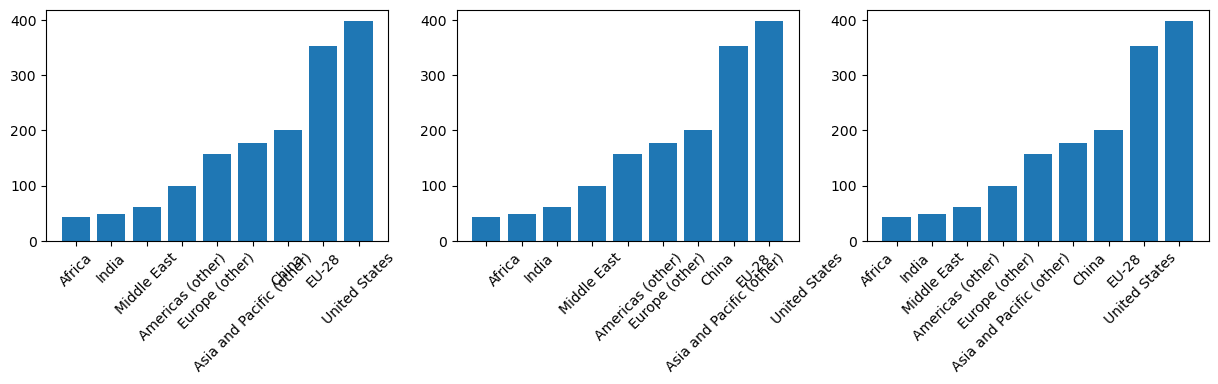

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.bar(region, co2_emissions)
ax2.bar(region, co2_emissions)
ax3.bar(region, co2_emissions)
ax1.set_xticks(region)
ax2.set_xticks(region)
ax3.set_xticks(region)
ax1.set_xticklabels(region, rotation=45)
ax2.set_xticklabels(region, rotation=45, ha='left')
ax3.set_xticklabels(region, rotation=45, ha='right')

`ha` stands for horizontal alignment, and determines the alignment of the text with the ticks. If you compare the three plots, you will see that without any `ha` the text will be aligned such that the middle of the word coincides with the tick. `ha='left'` leads to an alignment with the left end of the word and the tick and `ha='right'` leads to the right end of the word being aligned with the tick.

As you can see above, if you compare the output of CO2 emissions across different regions since the industrial revolution, Europe and the US have emitted far more CO2 than any other region. These two regions have emitted together more than the rest of the world combined.

### High dimensional data representation

For data sets with high dimensionality, **scatter plots** are a great option.  Data points are plotted on horizontal and vertical axis in order to show the dependence between variables. In addition to *x* and *y* axes, a third variable can be added represented by the *size* of the markers, thus adding yet another dimension to the plot. Finally, by adding different data sets with different *colours* to the plot, we can add in addition to three continuous a fourth categorical dimension. 

Let's see how the CO2 emissions compare with the GDP of different countries and their respective population size.

**Exercise 05:**

Load the `co-emissions-per-capita-vs-gdp-per-capita-international-.csv` file from `datasets`, and save it as `co2_vs_gdp`. Check out the first few entries. (Remark: we have preprocessed the data to contain only countries with a population >= 20 Million people).

In [53]:
co2_vs_gdp = pd.read_csv('datasets/co-emissions-per-capita-vs-gdp-per-capita-international-.csv')
co2_vs_gdp.head()

,Entity,CO₂ emissions per capita (tonnes per capita),GDP per capita (international-$ (in 2011 prices)),Total population (Gapminder)
0,Afghanistan,0.411531,1792.0,30117000.0
1,Algeria,3.253893,13204.0,36661000.0
2,Angola,1.244588,8016.0,24221000.0
3,Argentina,4.567022,20003.0,41320000.0
4,Australia,17.982660,46132.0,22538000.0


Text(0, 0.5, 'CO₂ emissions per capita (tonnes per capita)')

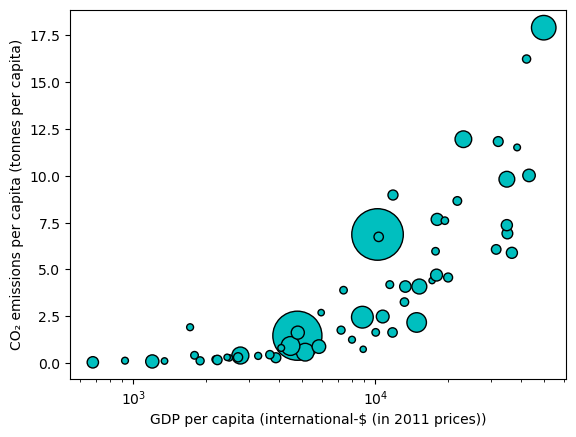

In [42]:
plt.xscale('log') # Note: we are using a log scale here to make the changes in the data more apparent
# Scatter plot, with size of blobs representing population size
plt.scatter(co2_vs_gdp['GDP per capita (international-$ (in 2011 prices))'],
            co2_vs_gdp['CO₂ emissions per capita (tonnes per capita)'],
            s=co2_vs_gdp['Total population (Gapminder)']/1e6,
            c='c',
            #If you don't use edgecolor, many blobs won't be visible. Try it out!
            edgecolors='k')
plt.xlabel('GDP per capita (international-$ (in 2011 prices))')
plt.ylabel('CO₂ emissions per capita (tonnes per capita)')

The above scatter plot is not very helpful. We don't know which countries are represented by which blob, and which regions are at which end of the scale... It is your job now to improve it.

**Exercise 06:**

a) In the last lab, the `drinks_by_country.csv` dataset contained the continents. Load that dataset (we have made a copy in this lab's `dataset` folder).

b) Merge the new DataFrame with the previous DataFrame (`co2_vs_gdp`). Careful: In `co2_vs_gdp` the country colum is called `Entity` whereas in `drinks_by_country` the country column is called `Country`.

c) Draw a new scatter plot using colours to represent in which continent the countries lie. Hint: Use a loop to filter the DataFrame for each unique values of the `Continent` column. Add a scatterplot for each newly filtered DataFrame to the current axes, using a different color in each loop. You can use the following `colours` array provided in the code cell below.

d) Create a legend for the colours.

d*) The blobs in the legend all have different sizes. Make them equal sized by saving your legend to a variable `lgnd = plt.legend()` and then call `lgnd.legendHandles[i]._sizes = [50]` with `i` ranging from 0 to the length of the continents array to make the blobs equal sized.

d) Find in your DataFrame:
- the country with the biggest population
- the country with the highest GDP
- the country with the lowest GDP
- the country with the highest CO2 emissions

e) Use Stackoverflow to find out how to add names to data points in scatter plots. Add the country names you have found above to the plot, in addition to one name of your choice from each continent.

In [60]:
# Parts a and b
drinkByCountry = pd.read_csv('datasets/drinks_by_country.csv')
co2_vs_gdp.rename(columns={'Entity': 'Country'}, inplace=True)
co2Merged = pd.merge(drinkByCountry, co2_vs_gdp)
co2Merged.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Total Litres of Pure Alcohol,Continent,CO₂ emissions per capita (tonnes per capita),GDP per capita (international-$ (in 2011 prices)),Total population (Gapminder)
0,Afghanistan,0,0,0,0.0,Asia,0.411531,1792.0,30117000.0
1,Algeria,25,0,14,0.7,Africa,3.253893,13204.0,36661000.0
2,Angola,217,57,45,5.9,Africa,1.244588,8016.0,24221000.0
3,Argentina,193,25,221,8.3,South America,4.567022,20003.0,41320000.0
4,Australia,261,72,212,10.4,Oceania,17.982660,46132.0,22538000.0


In [ ]:
colours = ['#d73027','#fc8d59','#fee090','#e0f3f8','#91bfdb','#4575b4']
# Get list of continents
# for each continent create a dataframe. Plot that dataframe with one of the colours
# Add a legend for each colour.
# Your code


: 

**Exercise 07:**

Create a figure with 4 subplots:
- one containing the line plot from Exercise 02, 
- one containing the stack plot
    - move the legend to the top left corner,
- one containing the bar chart with the cumulative CO2 emissions 
    - make the two bars with the highest CO2 emissions red and all the other bars grey,
- and one containing the scatter plot you created in Exercise 05.

Important: Not all plots above contain all the necessary data (e.g. legends, axis, labels, colourblind friendly colours...). Make sure that your figure contains all the necessary information but not too much. Add a title to your figure.

Finally, save your figure into a png file.

It is in your own interest not to copy and paste the previous code but to type the code yourself.

Discuss with your lab partner the data. Here is a highly recommendable [short video](https://www.youtube.com/watch?v=ipVxxxqwBQw) with more information.

In [ ]:
# Your code


: 